In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel('cobros_unificado 01-09-23 a 30-08-24.xlsx', sheet_name='FP COBROS')

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fec. Ing.             30000 non-null  object 
 1   Ingreso               30000 non-null  int64  
 2   Fec. Cobro            30000 non-null  object 
 3   Asegurado             30000 non-null  object 
 4   Cuota n°              30000 non-null  object 
 5   Póliza                30000 non-null  object 
 6   Compañía              30000 non-null  object 
 7   Mon.                  30000 non-null  object 
 8   Mto. Pagado           30000 non-null  float64
 9   Origen                30000 non-null  object 
 10  Cobrador              30000 non-null  int64  
 11  Numero De Referencia  29148 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.7+ MB
None


In [10]:
print('Detalle de Nulos:')
print(df.isnull().sum())

Detalle de Nulos:
Fec. Ing.                 0
Ingreso                   0
Fec. Cobro                0
Asegurado                 0
Cuota n°                  0
Póliza                    0
Compañía                  0
Mon.                      0
Mto. Pagado               0
Origen                    0
Cobrador                  0
Numero De Referencia    852
dtype: int64


In [11]:
print(df.describe())

            Ingreso    Mto. Pagado      Cobrador  Numero De Referencia
count  3.000000e+04   30000.000000  30000.000000          2.914800e+04
mean   1.788050e+07   13436.240537      0.164433          3.151837e+07
std    1.696633e+05   26159.870020      2.899737          9.043908e+05
min    1.759212e+07       1.690000      0.000000          2.951466e+07
25%    1.773660e+07     300.000000      0.000000          3.080949e+07
50%    1.788500e+07     750.000000      0.000000          3.148824e+07
75%    1.803338e+07   18645.000000      0.000000          3.217670e+07
max    1.818072e+07  657883.950000    100.000000          3.391090e+07


In [12]:
print('Cantidad de nulos:')
print(df.isnull().sum())

Cantidad de nulos:
Fec. Ing.                 0
Ingreso                   0
Fec. Cobro                0
Asegurado                 0
Cuota n°                  0
Póliza                    0
Compañía                  0
Mon.                      0
Mto. Pagado               0
Origen                    0
Cobrador                  0
Numero De Referencia    852
dtype: int64


In [13]:
from sklearn.impute import SimpleImputer
import numpy as np 

In [14]:
import pandas as pd

# Configurar pandas para mostrar números con coma flotante y dos decimales
pd.set_option('display.float_format', '{:,.2f}'.format)

cobros_por_origen = df.groupby('Origen')['Mto. Pagado'].sum()

print(cobros_por_origen)

Origen
CAJA SELF PRODUCTORES             53,409,074.86
CAJA WEB ASEGURADOS                6,127,114.67
COBRO EXPRESS ONLINE                 641,461.75
COBRO EXPRESS PRODUCTOR ONLINE    16,259,057.55
DEB AUT AMEX                       2,431,472.26
DEB AUT CABAL                        435,797.35
DEB AUT CBU                       22,171,931.60
DEB AUT MASTERCARD                 5,241,780.31
DEB AUT NARANJA                      378,535.93
DEB AUT VISA                     120,178,693.17
DTO 1RA CTA PRODUCTOS ESPEC.          95,168.66
MULTIPAGO OFF LINE                    37,054.00
MULTIPAGO ONLINE                      37,054.00
PAGO FACIL OFFLINE (AJUSTE)          385,901.60
PAGO FACIL ONLINE                132,329,639.88
PAGO24 ONLINE                        198,750.00
PAGOMISCUENTAS ONLINE              6,154,928.59
PAGOS LINK                        13,726,427.89
PLUSPAGOS ONLINE                     650,777.89
PROVINCIA NET ONLINE               1,889,605.93
RAPIPAGO OFF LINE                

In [15]:
print(df[['Mto. Pagado']].sum())

Mto. Pagado   403,087,216.12
dtype: float64


In [16]:
print(df[['Mto. Pagado']].median())

Mto. Pagado   750.00
dtype: float64


In [17]:
print(df.groupby('Mto. Pagado').size())

Mto. Pagado
1.69            1
10.23           1
20.72          15
25.56           1
26.00         145
             ... 
464,874.28      1
464,875.00      3
491,457.04      1
657,883.00      1
657,883.95      1
Length: 7485, dtype: int64


In [18]:

import pandas as pd

# Asegúrate de que la columna 'Fec. Cobro' esté en formato de fecha
df['Fec. Cobro'] = pd.to_datetime(df['Fec. Cobro'], errors='coerce')  # Convertir a datetime y manejar errores

# Definir el rango de fechas
fecha_inicio = '2024-08-01'  # Fecha de inicio
fecha_fin = '2024-08-07'     # Fecha de fin

# Filtrar por 'Origen' que contiene 'VISA' y por rango de fechas en 'Fec. Cobro'
filtro_VISA = df[
    (df['Origen'].str.contains('VISA', case=False)) &  # Filtro por 'VISA'
    (df['Fec. Cobro'] >= fecha_inicio) &  # Filtro por fecha de inicio
    (df['Fec. Cobro'] <= fecha_fin)       # Filtro por fecha de fin
][['Asegurado', 'Fec. Cobro', 'Mto. Pagado']]  # Seleccionar solo las columnas deseadas

# Imprimir el resultado filtrado
print(filtro_VISA)

                      Asegurado Fec. Cobro  Mto. Pagado
78       ACOSTA CARLOS ALBERTO  2024-08-02   152,507.68
113          RACHELE MARIANELA  2024-08-02   135,881.00
127     ANTOLIN GASTON EDUARDO  2024-08-02   129,256.14
147      SAUCEDO LUCIA AZUCENA  2024-08-02   123,479.00
183    BONETTI EDUARDO HORACIO  2024-08-02   113,911.00
...                         ...        ...          ...
28185     PAVONI PABLO EDUARDO  2024-08-02       243.00
28186    ROMERO MARCELO RAFAEL  2024-08-02       243.00
28187     ABAT JONATHAN LEONEL  2024-08-02       243.00
28190      ROLON LUCAS GABRIEL  2024-08-05       243.00
29775     ABAT JONATHAN LEONEL  2024-08-02        46.00

[395 rows x 3 columns]


C:\Users\usuario\AppData\Local\Temp\ipykernel_9456\2456290004.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fec. Cobro'] = pd.to_datetime(df['Fec. Cobro'], errors='coerce')  # Convertir a datetime y manejar errores


In [19]:

filtro_PAGO_FACIL = df[
    (df['Origen'].str.contains('PAGO FACIL', case=False)) &  # Filtro por 'VISA'
    (df['Fec. Cobro'] >= '2024-08-02') &  # Filtro por fecha de inicio
    (df['Fec. Cobro'] <= '2024-08-02')       # Filtro por fecha de fin
][['Asegurado', 'Fec. Cobro', 'Mto. Pagado']]  # Seleccionar solo las columnas deseadas
monto_total_PAGO_FACIL = filtro_PAGO_FACIL['Mto. Pagado'].sum()
print("Monto total de cobros con PAGO FACIL:", monto_total_PAGO_FACIL)

Monto total de cobros con PAGO FACIL: 1301214.52


In [20]:
print(df.groupby('Origen')[['Mto. Pagado','Numero De Referencia']].max())

                                Mto. Pagado  Numero De Referencia
Origen                                                           
CAJA SELF PRODUCTORES            387,029.00         33,910,900.00
CAJA WEB ASEGURADOS              100,016.51         33,629,352.00
COBRO EXPRESS ONLINE             105,955.00         32,747,109.00
COBRO EXPRESS PRODUCTOR ONLINE   198,245.19         33,908,660.00
DEB AUT AMEX                      91,748.00         32,469,538.00
DEB AUT CABAL                     59,930.55         31,554,048.00
DEB AUT CBU                      657,883.95         32,462,540.00
DEB AUT MASTERCARD               117,072.27         32,351,140.00
DEB AUT NARANJA                   61,856.00         31,640,512.00
DEB AUT VISA                     196,078.92         33,779,153.00
DTO 1RA CTA PRODUCTOS ESPEC.      22,527.17                   NaN
MULTIPAGO OFF LINE                17,477.00         30,659,590.00
MULTIPAGO ONLINE                  17,477.00         30,659,590.00
PAGO FACIL

In [21]:
bins = [0,134,319,3005,float('inf')]
labels = ['Cuota baja','Cuota media','Cuota alta','Cuota muy alta']
df['Cuota_Agrupada'] = pd.cut(df['Mto. Pagado'], 
                             bins = bins, 
                             labels = labels, 
                             right = False)

In [22]:
df.head()

,Fec. Ing.,Ingreso,Fec. Cobro,Asegurado,Cuota n°,Póliza,Compañía,Mon.,Mto. Pagado,Origen,Cobrador,Numero De Referencia,Cuota_Agrupada
0,24/06/2024,18066336,2024-06-14,INTELEKTRON S.A.,Cta.6/6,4/30706114/0,726 Fed.Patronal Seguros SA,$,"657,883.95",DEB AUT CBU,6,NaN,Cuota muy alta
1,21/02/2024,17871094,2024-02-16,INTELEKTRON S.A.,Cta.2/6,4/30706114/0,726 Fed.Patronal Seguros SA,$,"657,883.00",DEB AUT CBU,6,NaN,Cuota muy alta
2,18/07/2024,18109375,2024-07-15,OBRA SOCIAL DE RELOJEROS,Cta.1/4,4/32425709/0,726 Fed.Patronal Seguros SA,$,"491,457.04",PAGOS LINK,0,"33,570,136.00",Cuota muy alta
3,11/04/2024,17949902,2024-04-11,BASILE NAHUEL JEREMIAS,Cta.1/4,4/31373490/0,726 Fed.Patronal Seguros SA,$,"464,875.00",PAGO FACIL ONLINE,0,"32,086,429.00",Cuota muy alta
4,20/05/2024,18013690,2024-05-20,BASILE NAHUEL JEREMIAS,Cta.2/4,4/31373490/0,726 Fed.Patronal Seguros SA,$,"464,875.00",PAGO FACIL ONLINE,0,"32,086,429.00",Cuota muy alta


In [23]:
df['Cuota_Agrupada'].value_counts()

Cuota_Agrupada
Cuota alta        12062
Cuota muy alta    10297
Cuota media        7221
Cuota baja          420
Name: count, dtype: int64

<Axes: xlabel='Origen', ylabel='Mto. Pagado'>

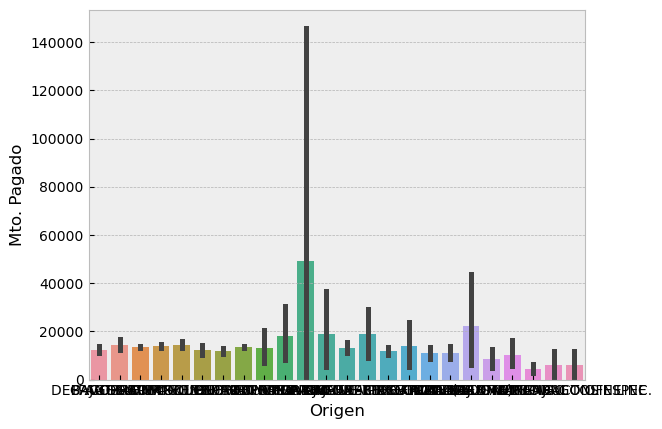

In [27]:
# Siguiendo los pasos 
# 1) Importar librerias 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 2) Crear objeto de figura
plt.figure()

# 3) Dibujar 
# BARPLOT 
sns.barplot(data = df,
           x = 'Origen',
           y = 'Mto. Pagado')

C:\Users\usuario\AppData\Local\Temp\ipykernel_9456\3756672797.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df.groupby(pd.Grouper(key='Fec. Cobro', freq='M'))['Mto. Pagado'].sum().reset_index()
c:\Users\usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


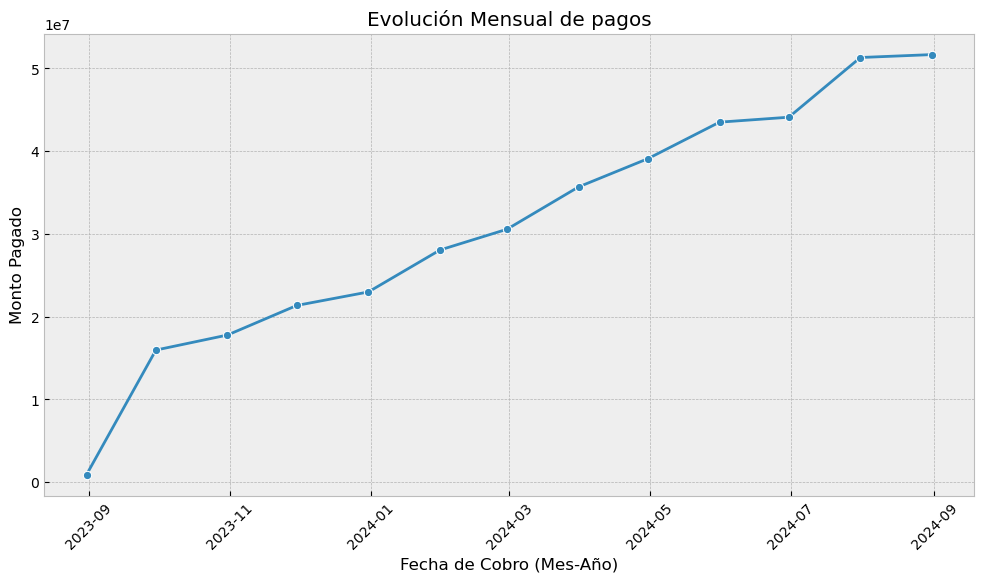

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['Fec. Cobro'] = pd.to_datetime(df['Fec. Cobro'], errors='coerce')

df_grouped = df.groupby(pd.Grouper(key='Fec. Cobro', freq='M'))['Mto. Pagado'].sum().reset_index()

df_grouped = df_grouped.sort_values(by='Fec. Cobro')

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_grouped, x='Fec. Cobro', y='Mto. Pagado', marker='o')

plt.title('Evolución Mensual de pagos')
plt.xlabel('Fecha de Cobro (Mes-Año)')
plt.ylabel('Monto Pagado')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad

# Mostrar gráfico
plt.show()

C:\Users\usuario\AppData\Local\Temp\ipykernel_9456\1640501002.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df.groupby(pd.Grouper(key='Fec. Cobro', freq='M'))['Mto. Pagado'].sum().reset_index()


Text(0, 0.5, 'Monto Pagado')

<Figure size 1200x600 with 0 Axes>

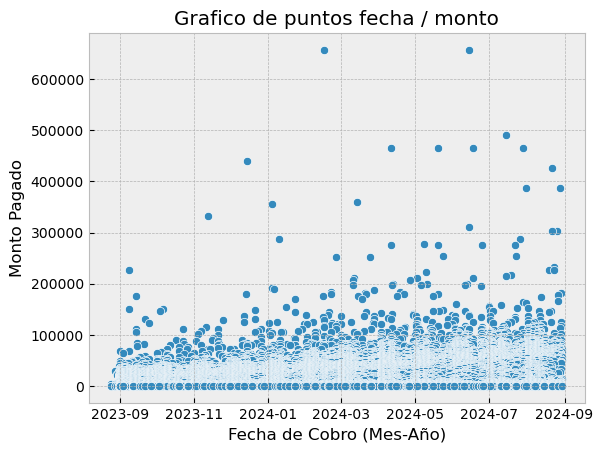

In [41]:
df['Fec. Cobro'] = pd.to_datetime(df['Fec. Cobro'], errors='coerce')

df_grouped = df.groupby(pd.Grouper(key='Fec. Cobro', freq='M'))['Mto. Pagado'].sum().reset_index()

df_grouped = df_grouped.sort_values(by='Fec. Cobro')

plt.figure(figsize=(12, 6))

plt.figure()
sns.scatterplot(data = df,
                x = 'Fec. Cobro',
                y = 'Mto. Pagado')

plt.title('Grafico de puntos fecha / monto')
plt.xlabel('Fecha de Cobro (Mes-Año)')
plt.ylabel('Monto Pagado')